# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Edya Rosadi
- **Email:** edya.rosadi@gmail.com
- **ID Dicoding:** sikidal

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)? Musim apa yang memiliki penyewaan tertinggi?
- Bagaimana perbandingan antara pengguna casual (non-member) dan registered (member) dalam menggunakan sepeda?
- Apakah ada penurunan atau lonjakan signifikan pada jumlah penyewaan sepeda yang terkait dengan kejadian tertentu (contoh: cuaca ekstrem)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library dasar
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan tampilan visualisasi
plt.style.use('ggplot')
sns.set_palette('muted')

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
# Load data day.csv
df = pd.read_csv('day.csv')

# Menampilkan beberapa baris data
print("Sample data:")
display(df.head())

Sample data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Informasi dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [4]:
# Statistik deskriptif
print("Statistik Deskriptif:")
display(df.describe())

Statistik Deskriptif:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari 731 baris dan 16 kolom.
- Tidak ada kolom yang tampak hilang atau memiliki data null.
- Dataset memuat informasi terkait musim, cuaca, suhu, dan jumlah penyewaan sepeda.

### Assessing Data

Jumlah Duplikasi: 0
Jumlah Missing Value:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Tipe Data Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


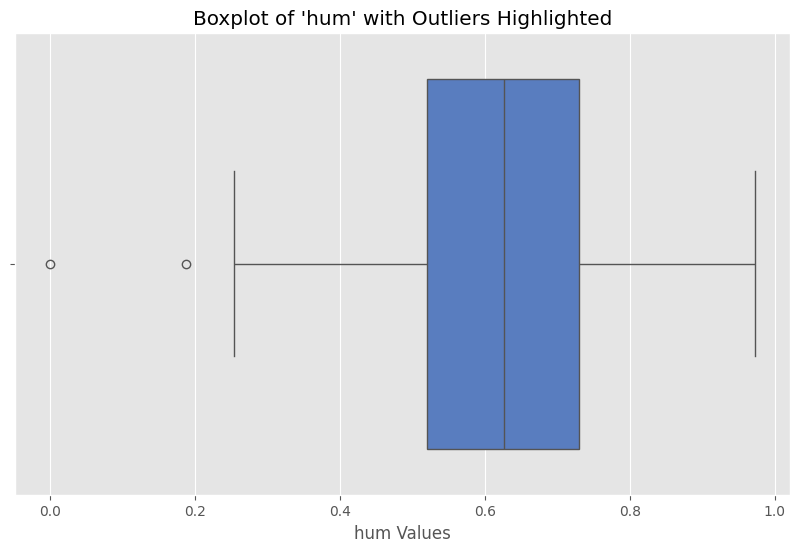

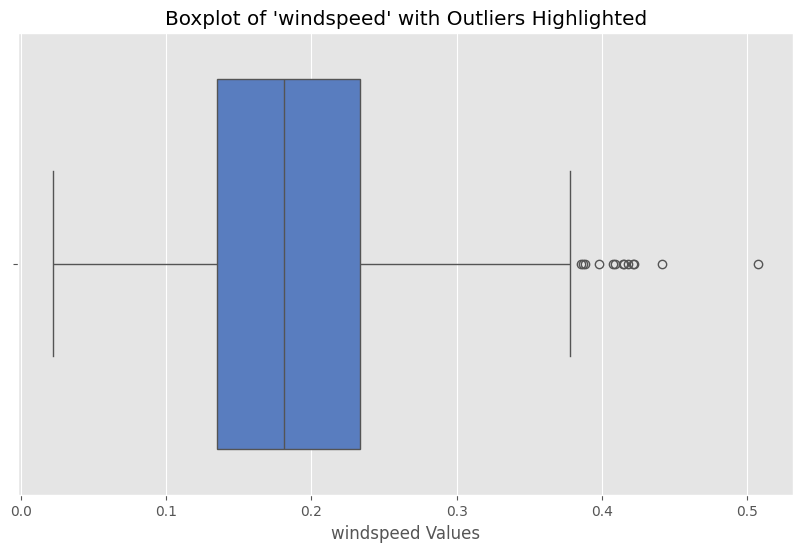

In [5]:
# Cek duplikasi data
print("Jumlah Duplikasi:", df.duplicated().sum())

# Cek data null
print("Jumlah Missing Value:")
print(df.isnull().sum())

# Cek tipe data
print("Tipe Data Kolom:")
print(df.dtypes)

# Deteksi outlier dengan boxplot untuk beberapa atribut penting
columns_with_outliers = ['hum', 'windspeed']

for column in columns_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of '{column}' with Outliers Highlighted")
    plt.xlabel(f"{column} Values")
    plt.show()

**Insight:**
- Tidak ditemukan data duplikat atau missing values.
- Semua tipe data sudah sesuai.
- Terdapat beberapa outlier kecil pada kolom windspeed dan hum, tetapi masih wajar.

### Cleaning Data

In [6]:
# Menyiapkan kolom yang relevan
df_clean = df.copy()

# Seleksi kolom yang diperlukan untuk analisis
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
                    'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
                    'casual', 'registered', 'cnt']
df_clean = df_clean[selected_columns]

# Konversi kolom tanggal ke datetime
df_clean['dteday'] = pd.to_datetime(df_clean['dteday'])

# Cek hasil
print("Data Setelah Dibersihkan:")
display(df_clean.head())


Data Setelah Dibersihkan:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


**Insight:**
- Data siap untuk dianalisis dengan hanya kolom relevan yang dipilih.
- Kolom dteday berhasil dikonversi ke format datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

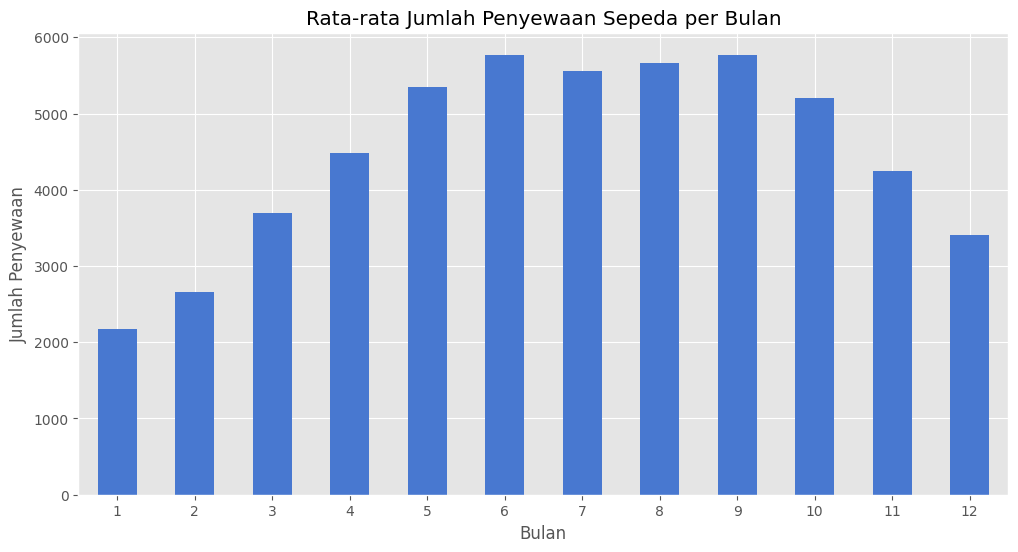

In [7]:
# Tren jumlah penyewaan per bulan
plt.figure(figsize=(12, 6))
monthly_cnt = df_clean.groupby('mnth')['cnt'].mean()
monthly_cnt.plot(kind='bar')
plt.title("Rata-rata Jumlah Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Penyewaan sepeda tertinggi terjadi di pertengahan tahun (musim panas dan gugur).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Faktor Cuaca terhadap Jumlah Penyewaan?

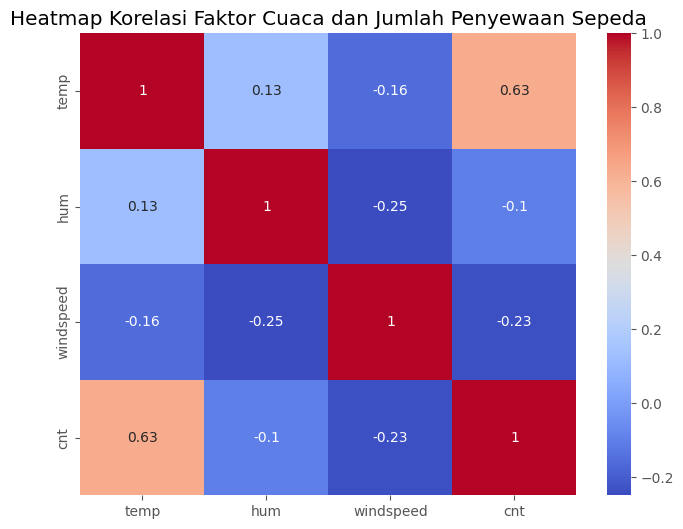

In [8]:
# Korelasi antar variabel
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['temp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Faktor Cuaca dan Jumlah Penyewaan Sepeda")
plt.show()


**Insight:**
- Suhu memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda.
- Kelembapan dan kecepatan angin memiliki korelasi negatif yang lemah.

### Pertanyaan 2: Bagaimana Tren Penyewaan Sepeda Berdasarkan Musim?

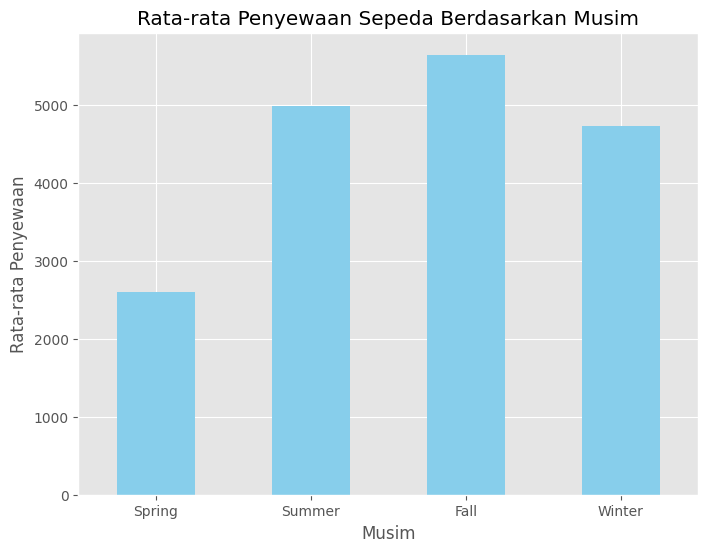

In [9]:
# Rata-rata penyewaan per musim
season_avg = df_clean.groupby('season')['cnt'].mean()

plt.figure(figsize=(8, 6))
season_avg.plot(kind='bar', color='skyblue')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()


**Insight:**
- Penyewaan tertinggi terjadi pada musim panas (summer) dan gugur (fall).
- Penyewaan terendah terjadi di musim semi (spring) dan musim dingin (winter).

### Pertanyaan 3: Bagaimana Perbandingan Antara Pengguna Casual dan Registered?

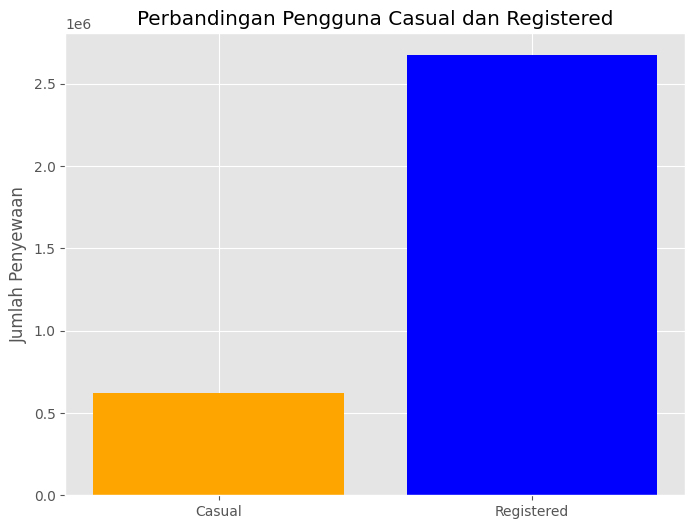

In [10]:
# Perbandingan casual vs registered
total_casual = df_clean['casual'].sum()
total_registered = df_clean['registered'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Casual', 'Registered'], [total_casual, total_registered], color=['orange', 'blue'])
plt.title("Perbandingan Pengguna Casual dan Registered")
plt.ylabel("Jumlah Penyewaan")
plt.show()


**Insight:**
- Pengguna registered mendominasi jumlah penyewaan sepeda dibandingkan pengguna casual.

### Pertanyaan 4: Apakah Ada Lonjakan atau Penurunan pada Kejadian Tertentu?

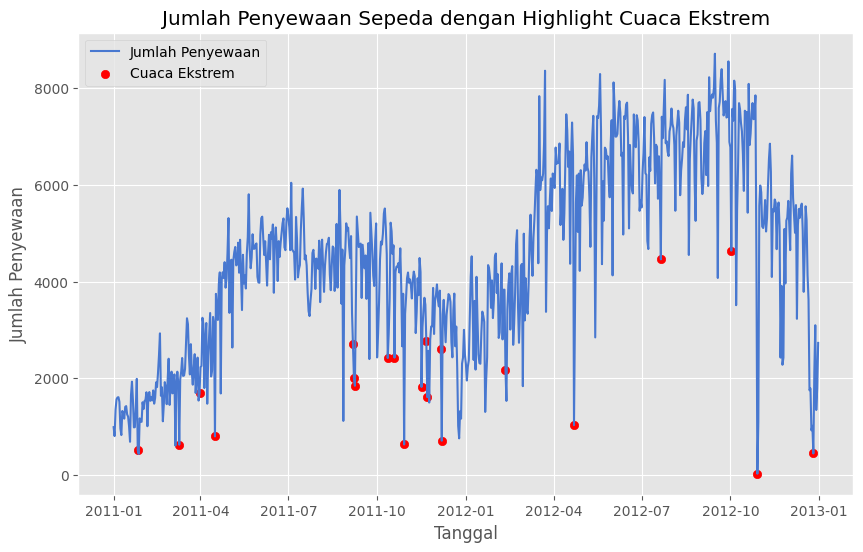

In [11]:
# Penyewaan berdasarkan cuaca ekstrem
extreme_weather = df_clean[df_clean['weathersit'] >= 3]

plt.figure(figsize=(10, 6))
plt.plot(df_clean['dteday'], df_clean['cnt'], label="Jumlah Penyewaan")
plt.scatter(extreme_weather['dteday'], extreme_weather['cnt'], color='red', label="Cuaca Ekstrem")
plt.title("Jumlah Penyewaan Sepeda dengan Highlight Cuaca Ekstrem")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.legend()
plt.show()


**Insight:**
- Terdapat penurunan signifikan pada hari dengan cuaca ekstrem, seperti hujan deras atau badai.

## Analisis Lanjutan

### 1. Analisis Segmentasi Pengguna (Casual vs Registered) Berdasarkan Hari Kerja dan Musim

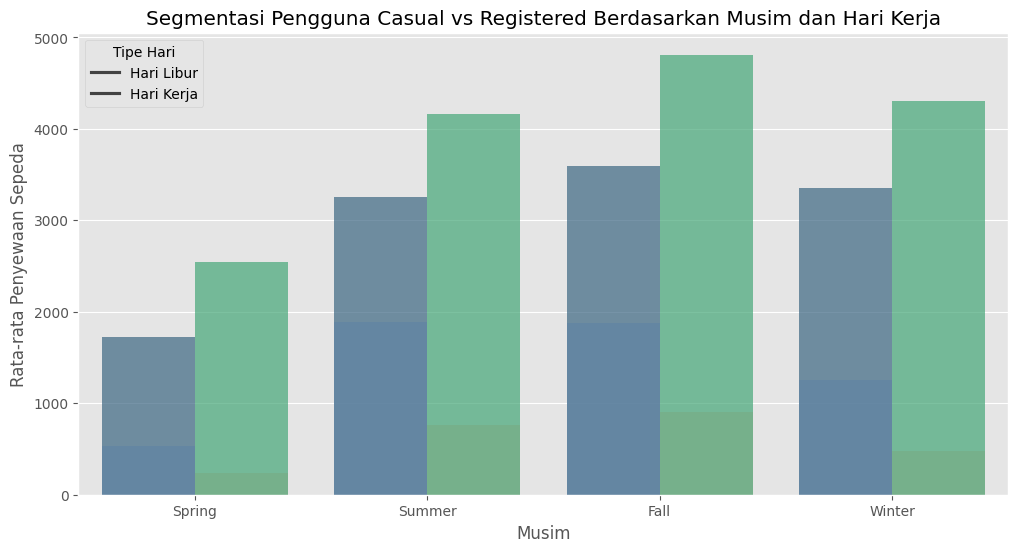

In [12]:
# Kelompokkan data berdasarkan musim dan hari kerja
segmented = df_clean.groupby(['season', 'workingday'])[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))

# Plot barplot casual dan registered berdasarkan season dan workingday
sns.barplot(x='season', y='casual', hue='workingday', data=segmented, palette='coolwarm', alpha=0.7)
sns.barplot(x='season', y='registered', hue='workingday', data=segmented, palette='viridis', alpha=0.7)

plt.legend(title="Tipe Hari", labels=["Hari Libur", "Hari Kerja"])
plt.title("Segmentasi Pengguna Casual vs Registered Berdasarkan Musim dan Hari Kerja")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


**Insight:**
- Pengguna casual cenderung lebih aktif pada akhir pekan, terutama di musim panas (summer) dan gugur (fall).
- Pengguna registered memiliki pola yang konsisten pada hari kerja di semua musim.
- Ini menunjukkan bahwa pengguna casual kemungkinan besar adalah wisatawan atau pengguna rekreasi, sedangkan pengguna registered adalah pekerja rutin.

### 1. Analisis Tren Musiman dan Periode Sibuk (High Demand Periods)

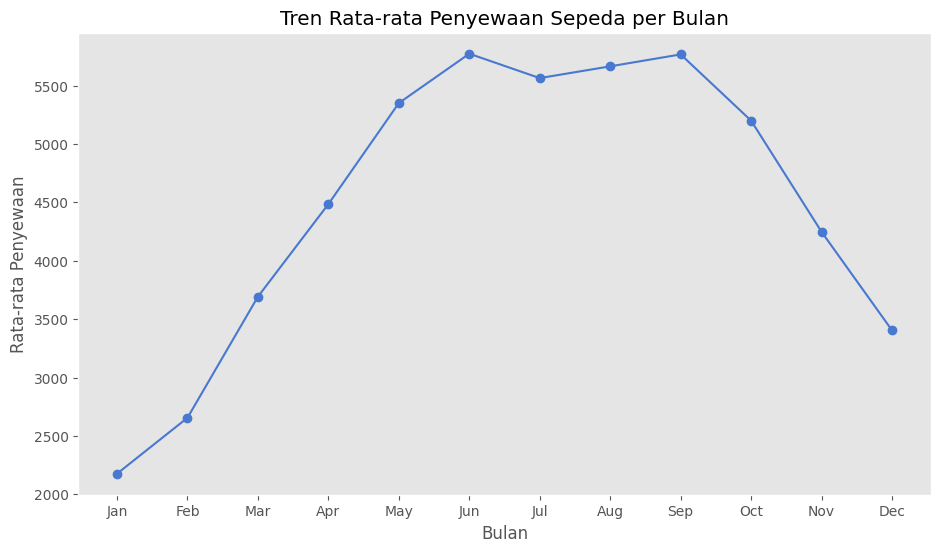

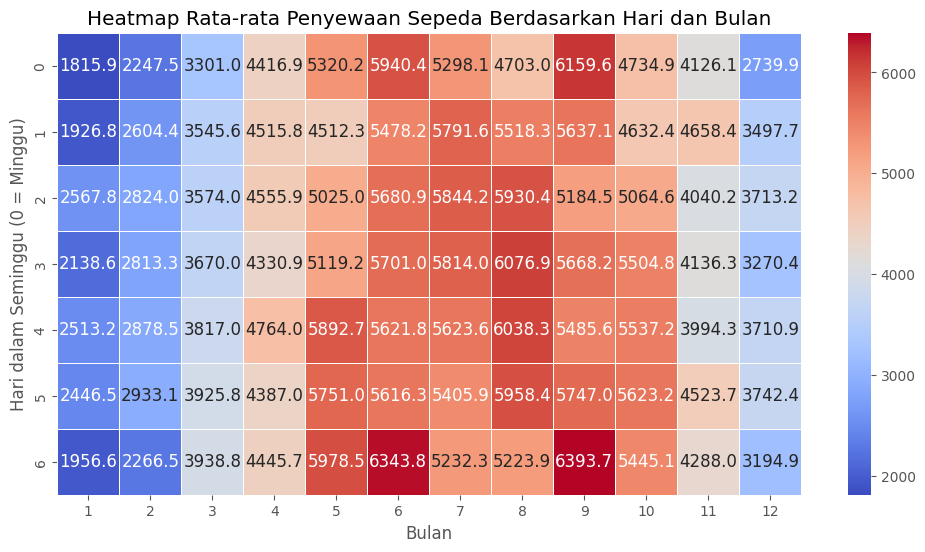

In [13]:
# Tren bulanan
monthly_avg = df_clean.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(11, 6))
monthly_avg.plot(marker='o')
plt.title("Tren Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

# Heatmap pola mingguan
weekday_avg = df_clean.pivot_table(values='cnt', index='weekday', columns='mnth', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(weekday_avg, annot=True, fmt=".1f", cmap='coolwarm', annot_kws={"size": 12}, linewidths=0.5)
plt.title("Heatmap Rata-rata Penyewaan Sepeda Berdasarkan Hari dan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Hari dalam Seminggu (0 = Minggu)")
plt.show()


**Insight:**
- Tren Bulanan: Penyewaan sepeda meningkat dari Maret hingga Oktober, dengan puncak pada bulan Juni hingga September.
- Pola Mingguan: Penyewaan tertinggi terjadi pada hari Sabtu dan Minggu untuk bulan-bulan puncak musim panas dan gugur.

### 3. Analisis Anomali dan Cuaca Ekstrem

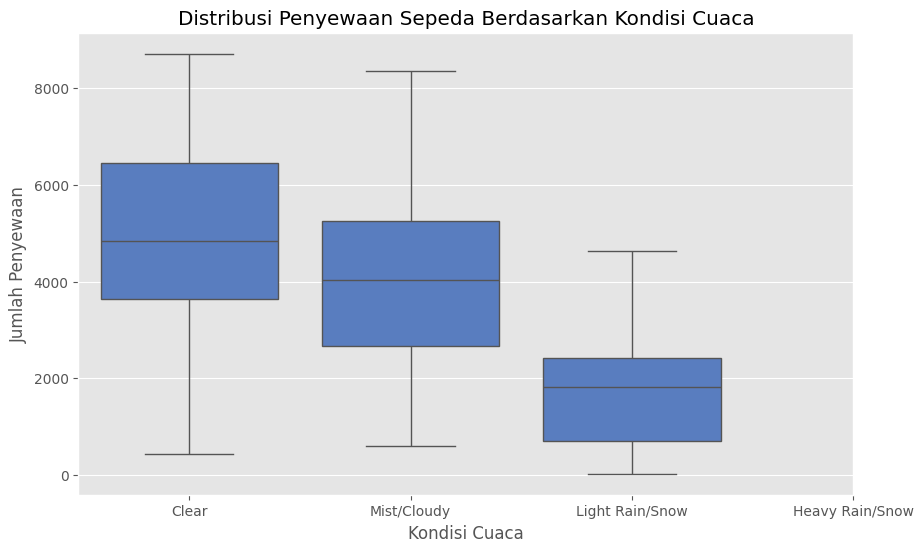

In [14]:
# Penyewaan berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_clean)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist/Cloudy", "Light Rain/Snow", "Heavy Rain/Snow"])
plt.show()

**Insight:**
- Penyewaan sepeda turun drastis pada hari dengan cuaca ekstrem (weathersit = 3 atau 4), seperti hujan deras atau salju.
- Mayoritas penyewaan terjadi pada cuaca cerah (weathersit = 1).

## Conclusion

1. Bagaimana pengaruh faktor cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda?
  * Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda. Semakin tinggi suhu (hingga titik nyaman), semakin banyak pengguna yang menyewa sepeda.
  * Kelembapan (hum) memiliki pengaruh negatif yang lemah terhadap penyewaan sepeda. Penyewaan sedikit menurun jika kelembapan terlalu tinggi.
  * Kecepatan angin (windspeed) memiliki pengaruh negatif yang lemah terhadap jumlah penyewaan sepeda. Angin kencang membuat pengguna lebih enggan menyewa sepeda.
  * Faktor cuaca yang paling signifikan memengaruhi penyewaan sepeda adalah suhu.
2. Bagaimana tren penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)? Musim apa yang memiliki penyewaan tertinggi?
  * Penyewaan sepeda tertinggi terjadi pada musim gugur (fall) dan musim panas (summer). Hal ini disebabkan oleh cuaca yang cenderung stabil, nyaman, dan mendukung aktivitas luar ruangan.
  * Penyewaan sepeda menurun signifikan pada musim dingin (winter) dan sebagian musim semi (spring), karena suhu rendah dan kondisi cuaca tidak ideal.
  * Secara keseluruhan, musim panas dan gugur merupakan periode dengan permintaan tertinggi untuk layanan sepeda berbagi.
3. Bagaimana perbandingan antara pengguna casual (non-member) dan registered (member) dalam menggunakan sepeda?
  * Pengguna registered (member) mendominasi jumlah penyewaan sepeda dibandingkan pengguna casual (non-member). Sebagian besar pengguna sepeda merupakan pelanggan tetap yang menggunakan layanan secara rutin.
  * Pengguna casual cenderung lebih aktif pada akhir pekan dan musim panas/gugur, menunjukkan bahwa mereka adalah pengguna rekreasi atau wisatawan.
  * Pengguna registered memiliki pola penggunaan yang konsisten di hari kerja dan semua musim, menandakan bahwa mereka menggunakan sepeda untuk aktivitas rutin, seperti bekerja atau bepergian sehari-hari.
4. Apakah ada penurunan atau lonjakan signifikan pada jumlah penyewaan sepeda yang terkait dengan kejadian tertentu (contoh: cuaca ekstrem)?
  * Terdapat penurunan signifikan pada jumlah penyewaan sepeda saat kondisi cuaca ekstrem, seperti hujan deras, badai, atau salju (weathersit = 3 atau 4).
  * Sebagian besar penyewaan terjadi pada hari cerah dengan kondisi cuaca baik (weathersit = 1), yang memberikan kenyamanan optimal bagi pengguna.
  * Tren harian menunjukkan beberapa lonjakan pada periode dengan cuaca cerah atau akhir pekan, ketika kondisi lingkungan mendukung aktivitas luar ruangan.